In [1]:
import numpy as np
import torch
from matplotlib import pylab as plt

In [3]:
data = np.load("burgers_prepped.npz")
u_in,u_out = data['u_in'],data['u_out']

In [66]:
def do_a_path(samp):
    u0 = u_in[9*samp]
    u0 = u0.reshape((1,1,u_in.shape[1]))
    u0 = torch.tensor(u0,dtype=torch.float32)
    plt.figure()
    plt.plot(u0.numpy().flatten())
    with torch.no_grad():
        for i in range(10):
            uN = model(u0)
            u0[:,:,1:-1] += uN
            plt.plot(u0.numpy().flatten())
    plt.show()

In [55]:
to_u_in = torch.tensor(u_in).reshape((u_in.shape[0],1,u_in.shape[1]))
to_u_out = torch.tensor(u_out-u_in[:,1:-1]).reshape((u_out.shape[0],1,u_out.shape[1]))

In [56]:
u_in.shape

(99, 21)

In [71]:
model = torch.nn.Sequential(
    torch.nn.Conv1d(1,15,3),
    torch.nn.LeakyReLU(),
    torch.nn.Conv1d(15,9,1),
    torch.nn.LeakyReLU(),
    torch.nn.Conv1d(9,3,1),
    torch.nn.LeakyReLU(),
    torch.nn.Conv1d(3,1,1)
)
loss = torch.nn.MSELoss(reduction='sum')

In [72]:
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [84]:
for t in range(10**4):
    random_batch = [0]*10
    for i in range(0,10):
        random_batch[i] = np.random.choice(u_in.shape[0]-1)
    random_batch = torch.LongTensor(random_batch)
    batch_x = to_u_in.index_select(0,random_batch)
    batch_y = to_u_out.index_select(0,random_batch)
    y_pred = model(batch_x)
    lo = loss(y_pred, batch_y)
    if t % 100 == 99:
        print(t, lo.item())
    optimizer.zero_grad()
    lo.backward()
    optimizer.step()

99 0.23638412356376648
199 4.972995758056641
299 1.9544647932052612
399 2.2266650199890137
499 1.3716579675674438
599 2.1165335178375244
699 1.0079874992370605
799 2.0983097553253174
899 2.1088578701019287
999 3.0858798027038574
1099 2.427654504776001
1199 0.413311243057251
1299 1.8427248001098633
1399 0.9402709007263184
1499 2.3913826942443848
1599 2.3992440700531006
1699 2.00067138671875
1799 4.539669990539551
1899 0.8913884162902832
1999 4.1718058586120605
2099 0.5892145037651062
2199 5.075636386871338
2299 1.8514033555984497
2399 2.0485894680023193
2499 1.7061687707901
2599 2.146766424179077
2699 0.7665037512779236
2799 1.1648290157318115
2899 1.9600542783737183
2999 2.761343479156494
3099 2.7570531368255615
3199 4.628020763397217
3299 1.349991798400879
3399 3.5787248611450195
3499 0.8017855882644653
3599 1.5232599973678589
3699 1.8216322660446167
3799 1.533133625984192
3899 3.797476291656494
3999 1.4949856996536255
4099 1.0656020641326904
4199 1.1118708848953247
4299 2.30813431739

In [ ]:
torch.nn.m

In [85]:
u0 = u_in[9]
u0 = u0.reshape((1,1,u_in.shape[1]))
u0 = torch.tensor(u0,dtype=torch.float32)
model(u0)

tensor([[[ 0.0698,  0.0707,  0.0629,  0.0415,  0.0330,  0.0367,  0.0403,
           0.0406,  0.0380,  0.0355, -0.0366, -0.0861, -0.0791, -0.0720,
          -0.0650, -0.0580, -0.0564, -0.0960, -0.1355]]],
       grad_fn=<SqueezeBackward1>)

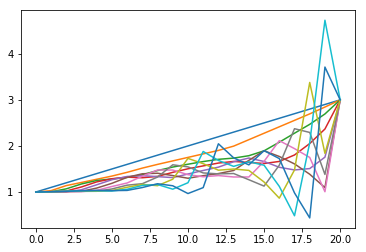

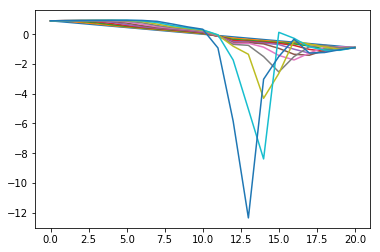

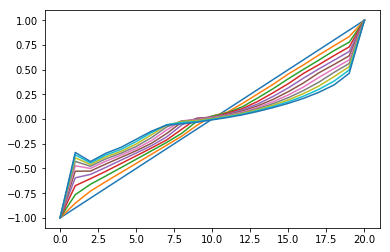

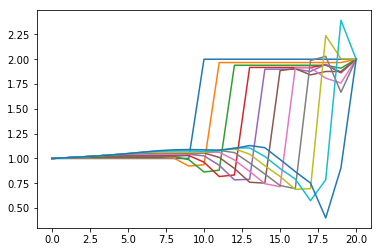

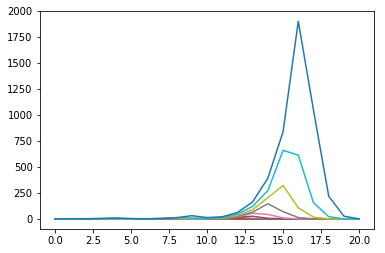

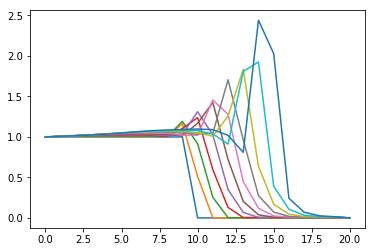

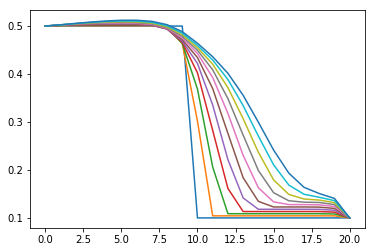

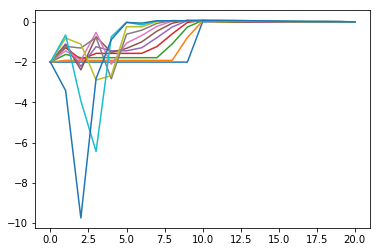

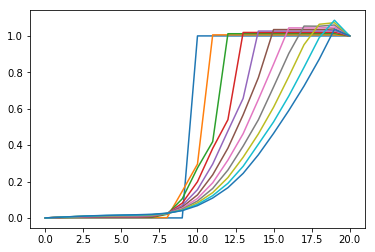

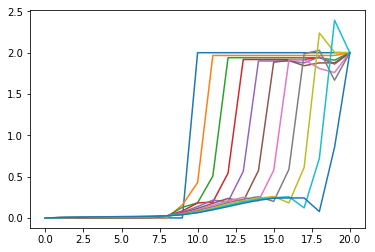

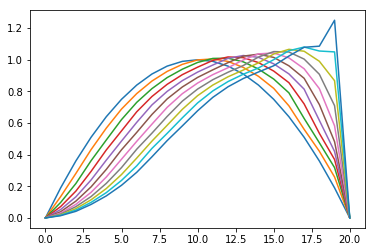

In [86]:
for i in range(11):
    do_a_path(i)